#### 2D Linear Elasticity: Plate with a hole subjected to axial loading

This example is heavily borrowed from the [online demo](https://comet-fenics.readthedocs.io/en/latest/demo/elasticity/orthotropic_elasticity.py.html) by J. Bleyer. 

In [1]:
from dolfin import *
from mshr import *
%matplotlib inline
L, R = 1., 0.1
N = 40 # mesh density

domain = Rectangle(Point(0.,0.), Point(L, L)) - Circle(Point(0., 0.), R)
mesh = generate_mesh(domain, N)

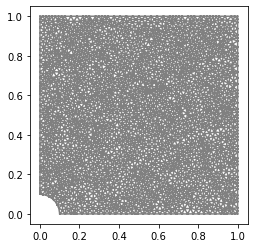

In [2]:
plot(mesh)

We will provide constitutive relation in terms of the Voigt notation (i.e., second order tensors will be written as vector of their components as discussed in the class Notes.) Let us take the case of __plane strain__. As per this case, we get that
$${\boldsymbol \sigma} = {\mathbf D}{\boldsymbol \epsilon},$$
which could be expanded as
$$
  \begin{Bmatrix} \sigma_{xx} \\ \sigma_{yy} \\ \sigma_{xy}
  \end{Bmatrix} = {E \over 1-\nu^2}\begin{bmatrix} 1 & \nu& 0\\
  \nu & 1 & 0 \\ 0 & 0 & {1-\nu \over 2} \end{bmatrix}\begin{Bmatrix}
  \sigma_{xx} \\ \sigma_{yy} \\ \sigma_{xy}
  \end{Bmatrix}
$$

In [3]:
E = 200.e9
nu = 0.3
C = E/(1-nu*nu)*as_matrix([[1, nu, 0],[nu, 1, 0],[0, 0, (1-nu)/2]])

In [4]:
def eps(v):
    return sym(grad(v))
def strain2voigt(e):
    """e is a 2nd-order tensor, returns its Voigt vectorial representation"""
    return as_vector([e[0,0],e[1,1],2*e[0,1]])
def voigt2stress(s):
    """
    s is a stress-like vector (no 2 factor on last component)
    returns its tensorial representation
    """
    return as_tensor([[s[0],s[2]],[s[2],s[1]]])
def sigma(v):
    return voigt2stress(dot(C,strain2voigt(eps(v))))


In [71]:
class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1],L) and on_boundary
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0],0) and on_boundary
class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1],0) and on_boundary

# exterior facets MeshFunction
facets = MeshFunction("size_t", mesh, 1)
facets.set_all(0)
Top().mark(facets, 1)
Left().mark(facets, 2)
Bottom().mark(facets, 3)
ds = Measure('ds')[facets]

Notation dx[meshfunction] is deprecated. Please use dx(subdomain_data=meshfunction) instead.


In [6]:
# Define function space
V = VectorFunctionSpace(mesh, 'Lagrange', 2)

# Define variational problem
du = TrialFunction(V)
u_ = TestFunction(V)
u = Function(V, name='Displacement')
a = inner(sigma(du), eps(u_))*dx

# uniform traction on top boundary
T = Constant((0, 1e-3))
l = dot(T, u_)*ds(1)

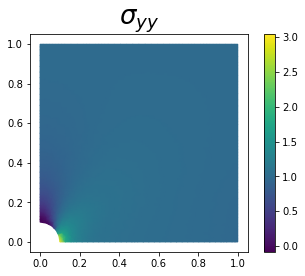

In [73]:
# symmetry boundary conditions
bc = [DirichletBC(V.sub(0), Constant(0.), facets, 2),
      DirichletBC(V.sub(1), Constant(0.), facets, 3)]

solve(a == l, u, bc)

import matplotlib.pyplot as plt
p = plot(sigma(u)[1,1]/T[1], mode='color')
plt.colorbar(p)
plt.title(r"$\sigma_{yy}$",fontsize=26)
plt.show()

In [7]:
A = sigma(u)[1,1]

In [8]:
T = TensorFunctionSpace(mesh, 'CG', 1)
t = project(grad(u), T)
t.split()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


(Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 7), FiniteElement('Lagrange', triangle, 1)), 45),
 Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 7), FiniteElement('Lagrange', triangle, 1)), 49),
 Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 7), FiniteElement('Lagrange', triangle, 1)), 53),
 Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 7), FiniteElement('Lagrange', triangle, 1)), 57))